# 구현 : 시뮬레이션과 완전탐색
### =>구현이란? 머릿속에 있는 알고리즘을 소스코드로 바꾸는 과정

In [1]:
# 흔한 알고리즘 대회에서 구현 유형의 문제란 무엇일까?
# -> 풀이를 떠올리는 것은 쉽지만 소스코드로 옮기기 어려운 문제를 지칭함

# 알고리즘은 간단한데 코드가 지나칠 만큼 길어지는 문제
# 실수 연산을 다루고, 특정 소수점 자리까지 출력해야 하는 문제
# 문자열을 특정한 기준에 따라서 끊어 처리해야 하는 문제
# 적절한 라이브러리를 찾아서 사용해야 하는 문제


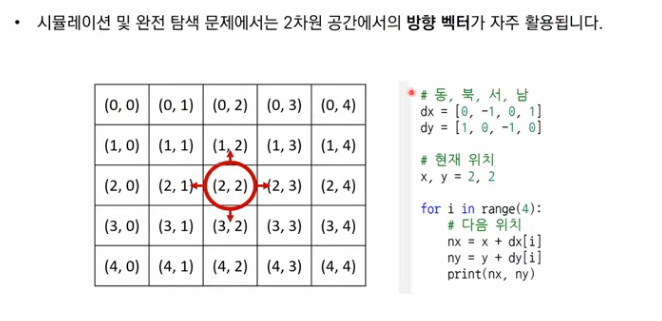

In [ ]:
# 동,북,서,남 
dx = [0,-1,0,1] //x는 행을 의미
dy = [1,0,-1,0] //y는 열을 의미

# 현재위치
x,y = 2,2

for i in range(4):
    # 다음 위치
    nx = x + dx[i]
    ny = y + dy[i]
    print(nx,ny)

### 상하좌우 : 문제설명

In [2]:
# 여행가 A는 N*N 크기의 정사각형 공간 위에 서 있습니다. 이 공간은 1*1 크기의 정사각형으로 나누어져 있습니다.
# 가장 왼쪽 위 좌표는 (1,1)이며, 가장 오른쪽 아래 좌표는 (N.N)에 해당합니다. 여행가 A는 상,하,좌,우 방향으로
# 이동할 수 있으며, 시작 좌표는 항상 (1,1)입니다. 우리 앞에는 여행가 A가 이동할 계획이 적힌 계획서가 놓여있습니다.
# 계획서에는 하나의 줄에 띄어쓰기를 기준으로 하며 L,R,U,D 중 하나의 문제가 반복적으로 적혀 있습니다.
# 각 문자의 의미는 다음과 같습니다.
# - L : 왼쪽으로 한 칸 이동
# - R : 오른쪽으로 한 칸 이동
# - U : 위로 한 칸 이동
# - D : 이래로 한 칸 이동

In [3]:
# 입력조건 )첫째 줄에 공간의 크기를 나타내는 N이 주어집니다(1<=N<=100)
#           둘째 줄에 여행가 A가 이동할 계획서 내용이 주어집니다(1<=이동횟수<=100)
# 출력조건 ) 첫째 줄에 여행가 A가 최종적으로 도착할 지점의 좌표(X,Y)를 공백을 기준으로 구분하여 출력합니다

In [10]:
# N 입력 받기
n = int(input())
x,y = 1,1 # 현재위치
plans = input().split()

# L,R,U,D에 따른 이동 방향
dx = [0,0,-1,1] # x는 행을 의미
dy = [-1,1,0,0] # y는 열을 의미
move_types=['L','R','U','D'] # 서.동,북,남

# 이동 게획을 하나씩 확인하기
for plan in plans:
    # 이동 후 좌표 구하기
    for i in range(len(move_types)):
        if plan == move_types[i]:
            nx = x + dx[i] 
            ny = y + dy[i]
        # 공간을 벗어나는 경우 무시
    if nx < 1 or ny < 1 or nx > n or ny > n:
        continue
    # 이동 수행
    x,y = nx, ny
print(x,y)

5
R R R U D D
3 4


### 시각 : 문제설명

In [11]:
# 정수 N이 입력되면 00시 00분 00초부터 N시 59분 59초까지의 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수를 구하는 프로그램을 작성하세요. 
# 예를 들어 1을 입력했을 때 다음은 3이 하나라도 포함되어 있으므로 세어야 하는 시각입니다.
# - 00시 00분 03초
# - 00시 13분 30초
# 반면에 다음 3이 하나도 포함되어 있지 않으므로 세면 안 되는 시각입니다.
# - 00시 02분 55초
# - 01시 27분 45초

In [12]:
# 하루는 86400초이므로 86400가지
# 단순히 시각을 1씩 증가시키면서 3이 하나라도 포함되어 있는지 확인하면 됩니다
# 이러한 유형은 완전 탐색 문제 유형 -> 가능한 경우의 수를 모두 검사해보는 탐색 방법

In [13]:
# H입력 받기
h = int(input())

count = 0

for i in range(h+1): #시
    for j in range(60): #분
        for k in range(60): #초
            # 매 시각 안에 '3'이 포함되어 있다면 카운트 증가
            if '3' in str(i)+str(j)+str(k): # 시분초를 문자형 형태로 만들어서 3이 포함되어있는지 체크
                count+=1
print(count)

5
11475


### 왕실 나이트 : 문제설명

In [14]:
# 행복 왕국의 왕실 정원은 체스판과 같은 8*8 좌표 평면이다.왕실 정원의 특정한 한 칸에 나이트가 서 있습니다.
# 나이트는 매우 충성스러운 산하로서 매일 무술을 연마합니다.
# 나이트는 말을 타고 있기 때문에 이동을 할 때는 L자 형태로만 이동할 수 있으며 정원 밖으로는 나갈 수 없습니다.
# 나이트의 특정 위치에서 다음과 같은 2가지 경우로 이동할 수 있습니다.
# 1. 수평으로 두 칸 이동한 뒤에 수직으로 한 칸 이동하기
# 2. 수직으로 두 칸 이동한 뒤에 수평으로 한 칸 이동하기

In [ ]:
# (입력 조건) 첫째 줄에 8*8좌표 평면상에서 현재 나이트가 위치한 곳의 좌표를 나타내는 두 문자로 구성된 문자 열이 입력된다. 
#            입력 문자는 a1처럼 열과 행으로 이뤄진다
# (출력 조건) 첫째 줄에 나이트가 이동할 수 있는 경우의 수를 출력하시오

# 현재 나이트의 위치 입력받기
input_data = input()
row = int(input_data[1])
column=int(ord(input_data[0]))-int(ord('a'))+1

# 나이트가 이동할 수 있는 8가지 방향 정의
steps = [(-2,-1),(-1,-2),(1,-2),(2,-1),(2,1),(1,2),(-1,2),(-2,1)]

# 8가지 방향에 대하여 각 위치로 이동이 가능한지 확인
result = 0
for step in steps:
    # 이동하고자 하는 위치 확인
    next_row = row + step[0]
    next_column = column + step[1]
    # 해당 위치로 이동이 가능하다면 카운트 증가
    if next_row >=1 and next_row <=8 and next_column >=1 and next_column <= 8:
        result +=1
print(result)